Load data

In [1]:
from EEG1DCNN.physionet_data_loader import PhysionetDataLoader
import mne

mne.set_log_level('WARNING')
subject_id = 'S003'
data_dir = r"D:\STUDIA\ZPB\eeg-motor-movementimagery-dataset-1.0.0\files"

data_loader = PhysionetDataLoader(data_dir)
raw = data_loader.load_subject_data(subject_id)

events, event_id = mne.events_from_annotations(raw)
print(f"Events: {events}")
print(f"Event IDs: {event_id}")

labels_to_consider = ['ILH', 'IRH', 'IBH', 'IBF']
events_to_consider = [event_id[label] for label in labels_to_consider]
epochs = mne.Epochs(
    raw, events, event_id=events_to_consider,
    tmin=0.0, tmax=4.0,
    preload=True,
    baseline=None,
    reject_by_annotation=True
)


epochs_data = epochs.get_data()
print(f"Original epochs shape: {epochs_data.shape}")

# Trim the last sample to change shape from (4, 64, 641) to (4, 64, 640)
epochs_data = epochs_data[:, :, :-1]
print(f"Trimmed epochs shape: {epochs_data.shape}")

epochs = mne.EpochsArray(epochs_data, epochs.info, 
                        events=epochs.events, 
                        tmin=epochs.tmin,
                        event_id=epochs.event_id)

print(f"Epochs shape: {epochs.get_data().shape}")
for label in labels_to_consider:
    print(f"Number of epochs for {label}: {len(epochs[event_id[label]])}")
    print(f"Epochs shape for {label}: {epochs[event_id[label]].get_data().shape}")

Successfully applied 10-05 montage to 64 channels out of 64
Successfully applied 10-05 montage to 64 channels out of 64
Successfully applied 10-05 montage to 64 channels out of 64
Successfully applied 10-05 montage to 64 channels out of 64
Successfully applied 10-05 montage to 64 channels out of 64
Successfully applied 10-05 montage to 64 channels out of 64
Successfully applied 10-05 montage to 64 channels out of 64
Successfully applied 10-05 montage to 64 channels out of 64
Successfully applied 10-05 montage to 64 channels out of 64
Successfully applied 10-05 montage to 64 channels out of 64
Successfully applied 10-05 montage to 64 channels out of 64
Successfully applied 10-05 montage to 64 channels out of 64
Successfully applied 10-05 montage to 64 channels out of 64
Successfully applied 10-05 montage to 64 channels out of 64
Events: [[     0      0      8]
 [  9760      0      8]
 [ 19520      0      8]
 ...
 [257456      0      4]
 [258112      0      8]
 [258784      0      3]]
Ev

C:\Users\Mateuusz\AppData\Local\Temp\ipykernel_18204\2401266683.py:26: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_data = epochs.get_data()
C:\Users\Mateuusz\AppData\Local\Temp\ipykernel_18204\2401266683.py:38: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  print(f"Epochs shape: {epochs.get_data().shape}")
C:\Users\Mateuusz\AppData\Local\Temp\ipykernel_18204\2401266683.py:41: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  print(f"Epochs shape for {label}: {epochs[event_id[label]].get_data().shape}")
C:\Users\Mateuusz\AppData\Local\Temp\ipykernel_18204\2401266683.py:41: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
 

Inspect data

Plotting topomap for ILH (event ID: 5)


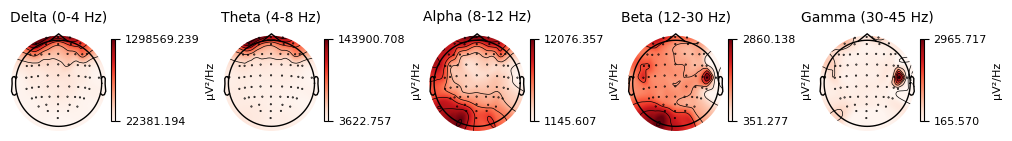

Plotting topomap for IRH (event ID: 6)


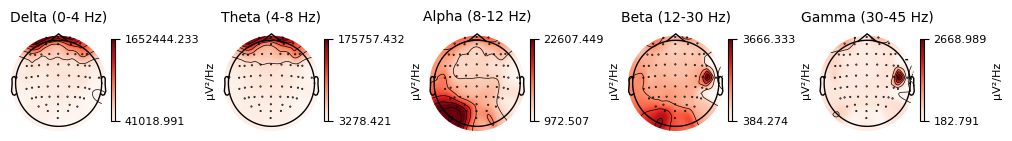

Plotting topomap for IBH (event ID: 4)


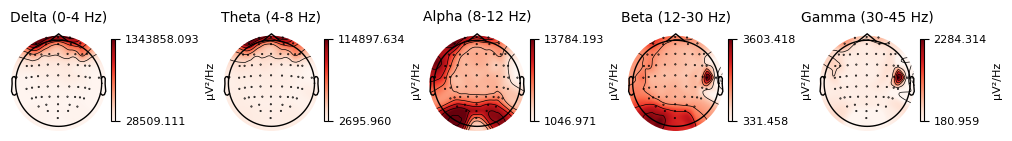

Plotting topomap for IBF (event ID: 3)


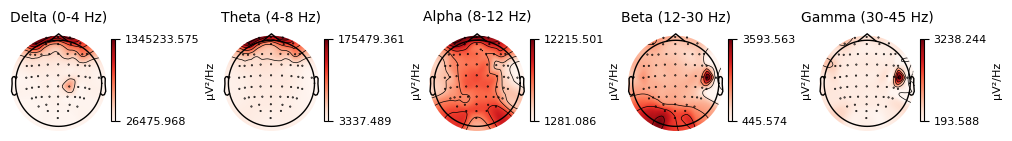

In [2]:
# Inspect data
raw.plot(n_channels=10, duration=5, start=0, show=True)

# Plot topomaps of each class
for label in labels_to_consider:
    mi = event_id[label]
    print(f"Plotting topomap for {label} (event ID: {mi})")
    epochs[mi].compute_psd().plot_topomap()

Test data scaling (experiment)

In [3]:
# # Standardize channel data
# scaler = mne.decoding.Scaler(epochs.info, scalings='median')
# X_scaled = scaler.fit_transform(epochs.get_data())  # Returns X array with shape (n_epochs, n_channels, n_times)

# # Plot topomaps of each class
# for label in labels_to_consider:
#     mi = event_id[label]
#     print(f"Plotting topomap for {label} (event ID: {mi})")
    
#     # Extract data for the specific class
#     class_data = X_scaled[epochs.events[:, 2] == mi]
    
#     import matplotlib.pyplot as plt

#     # Initialize a figure for the combined plot
#     fig, axes = plt.subplots(1, len([(0, 4), (4, 8), (8, 12), (12, 30), (30, 45)]), figsize=(20, 5))
#     fig.suptitle(f"Topomaps for {label}")

#     for ax, (fmin, fmax) in zip(axes, [(0, 4), (4, 8), (8, 12), (12, 30), (30, 45)]):
#         # Filter the data
#         filtered_data = mne.filter.filter_data(class_data, sfreq=epochs.info['sfreq'], l_freq=fmin, h_freq=fmax)
        
#         # Compute PSD and plot topomap
#         psd, freqs = mne.time_frequency.psd_array_multitaper(filtered_data, sfreq=epochs.info['sfreq'], fmin=fmin, fmax=fmax)
#         avg_psd = psd.mean(axis=0)
#         im, _ = mne.viz.plot_topomap(avg_psd.mean(axis=1), epochs.info, axes=ax, show=False)
#         ax.set_title(f"{fmin}-{fmax} Hz")

#     # Add a colorbar to the figure
#     cbar = fig.colorbar(im, ax=axes, orientation='vertical')
#     cbar.set_label('Power (dB)')

#     plt.tight_layout()
#     plt.show()


BF looks like contaminated by some artifact (electrode loosening?)

Preprocess data

In [ ]:
import numpy as np

electrode_pairs = [
    ('FC5', 'FC6'), ('FC3', 'FC4'), ('FC1', 'FC2'),
    ('C5', 'C6'), ('C3', 'C4'), ('C1', 'C2'),
    ('CP5', 'CP6'), ('CP3', 'CP4'), ('CP1', 'CP2')
]

def preprocess_data(epochs):
    """Convert MNE epochs to CNN-ready format with electrode pairs."""
    data = epochs.get_data()  # (n_epochs, n_channels, n_times)
    labels = epochs.events[:, -1]
    
    X, y = [], []
    for epoch_idx in range(data.shape[0]):
        epoch_data = data[epoch_idx]  # (n_channels, 640)
        for ch1, ch2 in electrode_pairs:
            # Get channel indices
            idx1 = epochs.ch_names.index(ch1)
            idx2 = epochs.ch_names.index(ch2)
            
            # Concatenate and reshape to (640, 2)
            pair_data = np.hstack([epoch_data[idx1], epoch_data[idx2]]).reshape(640, 2)
            X.append(pair_data)
        y.extend([labels[epoch_idx]] * len(electrode_pairs))  # Same label for all pairs
    
    X = np.array(X)[..., np.newaxis]  # Add channel dimension (n_samples, 640, 2, 1)
    y = np.array(y)
    return X, y

X, y = preprocess_data(epochs)
print(f"Preprocessed data shape: {X.shape}")

Preprocessed data shape: (1080, 640, 2, 1)


C:\Users\Mateuusz\AppData\Local\Temp\ipykernel_18204\2198991266.py:19: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # (n_epochs, n_channels, n_times)


Train

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, SpatialDropout2D,
    BatchNormalization, Flatten, Dense, LeakyReLU
)
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder

def build_model(input_shape=(640, 2, 1)):
    model = Sequential([
        # Temporal Convolution
        Conv2D(25, (11, 1), padding='valid', input_shape=input_shape),
        LeakyReLU(alpha=0.01),
        SpatialDropout2D(0.5),
        
        # Spatial Convolution
        Conv2D(25, (1, 2), padding='valid'),
        BatchNormalization(),
        LeakyReLU(alpha=0.01),
        MaxPooling2D((3, 1), strides=(3, 1)),
        
        # Temporal Convolution
        Conv2D(50, (11, 1), padding='valid'),
        LeakyReLU(alpha=0.01),
        SpatialDropout2D(0.5),
        MaxPooling2D((3, 1), strides=(3, 1)),
        
        # Temporal Convolution
        Conv2D(100, (11, 1), padding='valid'),
        BatchNormalization(),
        LeakyReLU(alpha=0.01),
        SpatialDropout2D(0.5),
        MaxPooling2D((3, 1), strides=(3, 1)),
        
        # Temporal Convolution
        Conv2D(200, (11, 1), padding='valid'),
        BatchNormalization(),
        LeakyReLU(alpha=0.01),
        MaxPooling2D((2, 1), strides=(2, 1)),
        
        Flatten(),
        Dense(4, activation='softmax')
    ])
    
    model.compile(
        optimizer=Adam(learning_rate=1e-5),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model


def train_model(X_train, y_train, X_val, y_val, epochs=2000, batch_size=32):
    model = build_model()
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=epochs,
        batch_size=batch_size,
        verbose=1
    )
    return model, history

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.1, stratify=y_encoded, random_state=11
)

# there is no window offseting, so we can shuffle data normally
# however i think this needs verification as signal can drift over time
# to check it uncomment the lines below and comapre the results
# if they are different, probably some preprocessing is needed

# split_point = int(0.9 * len(X))
# X_train, X_test = X[:split_point], X[split_point:]
# y_train, y_test = y_encoded[:split_point], y_encoded[split_point:]

print(f"Train data shape: {X_train.shape}, Train labels shape: {y_train.shape}")
print(f"Sample of X_train: {X_train[0]}")
print(f"Sample of y_train: {y_train[0]}")


Train data shape: (972, 640, 2, 1), Train labels shape: (972,)
Sample of X_train: [[[-6.40e-05]
  [-6.00e-05]]

 [[-6.90e-05]
  [-9.10e-05]]

 [[-1.12e-04]
  [-9.40e-05]]

 ...

 [[ 8.20e-05]
  [ 1.22e-04]]

 [[ 1.59e-04]
  [ 1.80e-04]]

 [[ 2.27e-04]
  [ 2.71e-04]]]
Sample of y_train: 0


In [ ]:
model, history = train_model(X_train, y_train, X_test, y_test)

c:\Users\Mateuusz\mne-python\1.7.1_0\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Mateuusz\mne-python\1.7.1_0\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/2000
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.2142 - loss: 1.4218 - val_accuracy: 0.2593 - val_loss: 1.3863
Epoch 2/2000
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.2447 - loss: 1.4046 - val_accuracy: 0.2593 - val_loss: 1.3863
Epoch 3/2000
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.2569 - loss: 1.3877 - val_accuracy: 0.2593 - val_loss: 1.3863
Epoch 4/2000
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.2432 - loss: 1.3888 - val_accuracy: 0.2593 - val_loss: 1.3863
Epoch 5/2000
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.2502 - loss: 1.3871 - val_accuracy: 0.2593 - val_loss: 1.3862
Epoch 6/2000
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.2541 - loss: 1.3914 - val_accuracy: 0.2593 - val_loss: 1.3862
Epoch 7/2000
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.2780 - loss: 1.3859 - val_accuracy: 0.2593 - val_loss: 1.3862
Epoch 8/2000
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.2530 - loss: 1.3877 - val_accu

Evaluate

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

def evaluate_model(model, X_test, y_test):
    # Calculate accuracy
    y_pred = model.predict(X_test).argmax(axis=1)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Calculate AUC
    y_probs = model.predict(X_test)
    auc = roc_auc_score(y_test, y_probs, multi_class='ovr')
    
    # Classification report
    report = classification_report(y_test, y_pred, target_names=['T1', 'T2', 'T3', 'T4'])
    
    return {
        'accuracy': accuracy,
        'auc': auc,
        'report': report
    }

results = evaluate_model(model, X_test, y_test)
print(f"Test Accuracy: {results['accuracy']:.2%}")
print(f"Test AUC: {results['auc']:.3f}")
print("\nClassification Report:\n", results['report'])